# Advanced Certification Program in Deep Learning
## A program by IISc and TalentSprint
### Assignment 3: Probability and Statistics

## Learning Objectives

At the end of the experiment, you will be able to

* get a broad exposure of the random variables and the way to deal them.
* understand the terms like experiment, outcome, sample space and event
* understand the concepts of discrete, continuous random variables and distributions
*   understand PMF, PDF and joint distributions
* understand maximum likelihood estimates, priors, and conjugate priors
* apply the concept of Bayesian Inference
* understand the concepts of the exponential family and beta-binomial

*   understand measure of variability
*   understand marginal, conditional probability, and chain rule
*   understand about independence and conditional independence
*   understand Bayes Theorem


### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M1_AST_03_Probability_Statistics_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



#### Importing required packages

In [ ]:
import numpy as np
import pandas as pd
import scipy                        # scientific computation library
import scipy.stats as stats
from scipy.stats import beta, norm
from scipy.stats import binom
from scipy.stats import expon
from scipy.stats import multivariate_normal
from scipy.stats import uniform
from scipy.stats import bernoulli
from math import factorial
import matplotlib.pyplot as plt     # Visualization
import seaborn as sns               # Advaced Visualization with high level interface
from scipy import integrate         # several integration techniques
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")

### Random Variables

Random variable is basically a function which maps from the set of sample space to set of real numbers. The purpose is to get an idea about result of a particular situation where we are given probabilities of different outcomes.

   Formal definition :   $ X: S -> R $

where,  $X$ = random variable, $S$ = set of sample space, $R$ = set of real numbers
   
To know more about random variables click [here](http://www.stat.yale.edu/Courses/1997-98/101/ranvar.htm).
   
There are mainly two types of random variables: discrete and continuous as shown in figure below

![image](https://cdn.iisc.talentsprint.com/CDS/Images/Random_variables.jpg)

Constructing probability distributions for random variables

### Discrete Random Variable and PMF

A random variable $X$ is said to be discrete if it takes on finite number of values. The probability function associated with it is said to be probability mass function or PMF.
$P(x_i)$ = Probability that $(X = x_i)$ = PMF of $X = p_i$.

* $ 0 ≤ p_i ≤ 1 $
* $ ∑p_i = 1 $ where the sum is taken over all possible values of X 

**Exercise 1:** Let $S$ is the sample space given below and corresponding $P(X=x_i)$ is also given, where $X$ is a discrete random variable. Find the probability at $X=0$.

In [ ]:
df1 = pd.DataFrame({'X=0': '?', 'X=1':0.2, 'X=3': 0.3, 'X=4': 0.1}, index= ['P(X=xi)'])
df1

In [ ]:
# For a discrete random variable we know that sum of all P(X=xi) = 1,
df1['X=0'] = 1 - sum(df1.iloc[0,1:])
df1

**Exercise 2:** Plot the PMF of the discrete random variable X defined as total number of heads while tossing a coin thrice.

In [ ]:
# Our sample space would consist of {HHH, HHT,HTH, THH, TTH, THT, HTT, TTT}
X = [0, 1, 2, 3]   # Number of heads we can get are

P_X0 = 1/8   # P(X=0)     {TTT}
P_X1 = 3/8   # P(X=1)     {HTT, THT, TTH}
P_X2 = 3/8   # P(X=2)     {HHT, HTH, THH}
P_X3 = 1/8   # P(X=3)     {HHH}
P_Xi = [P_X0, P_X1, P_X2, P_X3]

In [ ]:
# Plotting PMF
sns.barplot(x= X, y= P_Xi)
plt.title('PMF'); plt.xlabel('Number of heads'); plt.ylabel('Probability')
plt.show()

In [ ]:
# Plotting CDF or cumulative distribution function
sns.barplot(x= X, y= np.array(P_Xi).cumsum())
plt.title('Cumulative Distribution Function'); plt.xlabel('Number of heads'); plt.ylabel('Cumulative Probability')
plt.show()

For further reference [click here](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)

From above plot it can be seen that $ ∑p_i = 1 $. 

### Continuous Random Variable and PDF

A random variable $X$ is said to be continuous if it takes on the infinite number of values. The probability function associated with it is said to be PDF or probability density function.

PDF: If $X$ is a continuous random variable.

$ P (x < X < x + dx) = f(x).dx $

* $ 0 ≤ f(x) ≤ 1; $ for all $x$
* $ ∫ f(x) dx = 1  $ over all values of $x$

Then $P (X)$ is said to be a PDF of the distribution.

The probability distribution of a continuous random variable $X$ is an assignment of probabilities to intervals of decimal numbers using a function $f(x)$, called a density function, in the following way: the probability that $X$ assumes a value in the interval $(a,b)$ is equal to the area of the region that is bounded above by the graph of the equation $y=f(x)$, bounded below by the $x$-axis, and bounded on the left and right by the vertical lines through $a$ and $b$, as shown in the figure below
![image](https://cdn.iisc.talentsprint.com/CDS/Images/prob_density_function.png)

**Exercise 3:** Compute the value of $P (1 < X < 2)$.
    Such that the density function is given by,
    
$$f(x)=\begin{equation}
\left\{ 
  \begin{aligned}
    &k.x^3&  for\ \  0 ≤ x ≤ 3\\ 
    &0&   \  otherwise\\ 
  \end{aligned}
  \right.
\end{equation}
$$
     
Also, plot the PDF and CDF for random variable $X$.

In [ ]:
# ∫ f(x) dx = 1
# Using the above property we find k,
# ∫ (k*x**3)dx = 1
# k = 1 / ∫ (x**3)dx
k = 1 / (integrate.quad(lambda x: x**3, 0, 3)[0])        # integrate  x^3  w.r.t  x from 0 to 3
print('k= ', round(k,4))

k=  0.0494


In [ ]:
# Now the probability density for 1<X<2 is given by,
P = integrate.quad(lambda x: k*x**3, 1,2)[0]
print('P(1<X<2)= ', round(P, 4))

P(1<X<2)=  0.1852


In [ ]:
# Create 100 values within 0 to 3 in order to plot PDF and CDF
x = np.linspace(0,3,100)
df2 = pd.DataFrame({'X':[], 'PDF':[], 'CDF':[]})
df2['X'] = x
df2['PDF'] = df2['X'].apply(lambda v: k*v**3)
df2['CDF'] = df2['X'].apply(lambda v: integrate.quad(lambda u: k*u**3, 0, v)[0])
df2.head()

,X,PDF,CDF
0,0.000000,0.000000,0.000000e+00
1,0.030303,0.000001,1.041020e-08
2,0.060606,0.000011,1.665633e-07
3,0.090909,0.000037,8.432265e-07
4,0.121212,0.000088,2.665012e-06


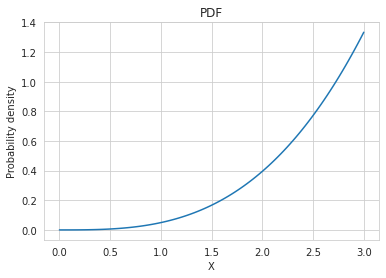

In [ ]:
# Plotting PDF
sns.lineplot(x= 'X', y= 'PDF', data= df2)
plt.title('PDF'); plt.xlabel('X'); plt.ylabel('Probability density')
plt.show()

In [ ]:
# Plotting CDF
sns.lineplot(x= 'X', y= 'CDF', data= df2)
plt.title('Cummulative distribution function'); plt.xlabel('X'); plt.ylabel('Probability density')
plt.show()

From above plot it can be seen that $ ∫f(x) dx = 1  $. 

### Constructing probability distributions for random variables and Expected value

**Constructing probability distributions for random variables:-**The probability distribution of a discrete random variable  $X$  is a list of each possible value of $X$  together with the probability that  $X$  takes that value in one trial of the experiment.

The probabilities in the probability distribution of a random variable  X  must satisfy the following two conditions:

Each probability  $P(x)$  must be between  0  and  1 :

* $ 0 ≤ P_i ≤ 1 $

The sum of all the possible probabilities is  1 :
* $ ∑P_i = 1 $ 




**Expected value of a random variable:-**Let  X  be a numerically-valued discrete random variable with sample space  Ω  and distribution function  m(x) . The expected value  E(X)  is defined by provided this sum converges absolutely. It is represented as:

$E(X)=\sum_{x∈}Ωxm(x)$ ,



**Exercise 4:** The random variable $X$ has a probability function:
\begin{equation}
             \nonumber P(X=x) = \left\{
              \begin{array}{l l}
                k(x+4) & \quad,  x= 0,1,2\\
                k*x & \quad  , x=3,4,5
              \end{array} \right.
            \end{equation}
Find the value of k, construct the probability distribution table and the expected value 

In [ ]:
#K(X+4) for x=0,1,2

lis = []
for i in range(6):
    if  i<=2:
       i+=4
       lis.append(i) 
    else:
      lis.append(i)

k = 1/sum(lis)
print("The value of K is:", k)
data  = {
    "values": lis,
    }
df = pd.DataFrame(data)
print (df)
df["probability_distribution"] = df["values"] * k
print (df["values"])
print(df["probability_distribution"].sum())
#creating a new column with the product of the columns of values and probability
df['expected_value'] = df['values']*df['probability_distribution']
#expected value 
print("The expected value is:",df['expected_value'].sum())

The value of K is: 0.037037037037037035
   values
0       4
1       5
2       6
3       3
4       4
5       5
0    4
1    5
2    6
3    3
4    4
5    5
Name: values, dtype: int64
1.0
The expected value is: 4.703703703703703


### Expected value of a random variable

**Expected value of a random variable:-**Let  X  be a numerically-valued discrete random variable with sample space  Ω  and distribution function  m(x) . The expected value  E(X)  is defined by provided this sum converges absolutely. It is represented as:

$E(X)=\sum_{x∈}Ωxm(x)$ ,



**Exercise 5:** Let $S$ is the sample space given below and corresponding $P(X=x_i)$ is also given, where $X$ is a discrete random variable. Find the Expected value.

In [ ]:
data = {
  "values": [0, 1, 2,3,4,5],
  "probability_outcomes": [0.15, 0.2, 0.15,0.25,0.15,0.1]
}

df = pd.DataFrame(data)#load data into a DataFrame object

df['expected_value'] = df['values']*df['probability_outcomes']#creating a new column with the product of the columns of values and probability

print("The expected value is:",df['expected_value'].sum())#expected value 

### Probability Distributions

**Probability distribution**:- It is a statistical function that describes all the possible values and likelihoods that a random variable can take within a given range.
There are many types of Probability distribution,such as:-

*   Bernoulli Distribution
*   Uniform Distribution
*   Binomial Distribution
*   Normal Distribution
*   Multivariate Normal Distributions
*   Poisson Distribution
*   Exponential Distribution


### Bernoulli Distribution

**Bernoulli Distribution**:-It is a discrete distribution having two possible outcomes labeled by n=0 and n=1 in which n=1 ("success") occurs with probability p and n=0 ("failure") occurs with probability q=1-p, where 0<p<1. The outcome is either 0 or 1 always.

Probability mass function of Bernoulli distribution is :-
$ P(n)=p^{n}(1-p)^{(1-n)}$ 	


To understand more click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html)


**Exercise 6:** Create a Bernoulli distributed discrete random variable plot a graph using the achieved data.

In [ ]:
# Creating a data of size 10000 and with the probability success as half i.e 0.2
data_bernoulli = bernoulli.rvs(size=10000,p=0.2)

In [ ]:
ax= sns.distplot(data_bernoulli,
                 kde=False)
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

### Uniform Distribution

**Uniform Distribution**:- A continuous random variable X is said to have a Uniform distribution over the interval [a,b], shown as X∼Uniform (a,b). The probability distribution function of the continuous uniform distribution is:
\begin{equation}
             \nonumber f_X(x) = \left\{
              \begin{array}{l l}
                \frac{1}{b-a} & \quad  a < x < b\\
                0 & \quad x < a \textrm{ or } x > b
              \end{array} \right.
            \end{equation}
To understand more click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)

**Exercise 7:** Create a uniform distributed discrete random variable with lower bounds and upper bounds and plot it.

In [ ]:
# Random numbers from uniform distribution
n = 10000
data_uniform = uniform.rvs(size=(1000,6000))

In [ ]:
# Ploting the graph
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist =True)
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

### Binomial Distribution

**Binomial Distribution**:- It is defined as when there is only one outcome for each trail, that each trail has the same probability of success, and that each trial is mutually exclusive or independent of the other.

 Its probability distribution function is given by :
 
$f(k,n,p) = Pr(k;n,p) = Pr(X=k) =\begin{pmatrix}
n \\
k 
\end{pmatrix} p^k(1-p)^{n-k}$




where :
$\binom{n}{k} = \frac{n!}{k!(n-k)!}$
To understand more click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)


**Exercise 8**:
Generate a binominal distributed random data and plot it.

In [ ]:
# Creating the binominal distribution data where n is the number of trails, p is the p probability size  is the  number of trials
data_binom = binom.rvs(n=200,p=0.6,size=1000)
# Ploting the graph
ax = sns.distplot(data_binom,
                  kde=True,
                  color='skyblue',
                  hist ={"linewidth": 25,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

### Normal Distribution

**Normal Distribution**:-
A continuous random variable $Z$ is said to be a standard normal (standard Gaussian) random variable, shown as $Z∼N(0,1)$, if its PDF is given by 

\begin{equation}
             \nonumber f_X(x) = \frac{e^{-(x - \mu)^{2}/(2\sigma^{2}) }} {\sigma\sqrt{2\pi}}.
            \end{equation}


It is a probability distributionwhich is symmetric to the mean and showing that the data near the mean is more frequent occurrence when compared to other data. Normal distribution or Gaussian distribution is usually appeared as a bell curve.


Where:- f(x) = probability, x = value of the variable, μ = mean, σ = standard deviation, σ2 = variance.
To understand more click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

**Exercise 9**:- Generate a normal distributed random data and plot it.

In [ ]:
# Generate random 
data_normal = norm.rvs(size=10000,random_state = 2)

In [ ]:
#ploting the graph
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist= True)
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

### Poisson Distribution

**Poisson Distribution**:- The Poisson distribution is used to model the number of events occurring within a given time interval. The formula for the Poisson probability mass function is.

$P(x; μ) = (e^{-μ} * μ^{x}) / x!$

To understand more click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)

**Exercise 10:-**Generate a Poisson random data and plot it.

In [ ]:
# Generate random normalised data
data_normal = norm.rvs(size=10000)

In [ ]:
# Ploting the graph
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist= True)
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

### Exponential Distribution

**Exponential Distribution:-**A continuous random variable $X$ is said to have an exponential distribution with parameter $λ>0$, shown as $X∼Exponential(λ)$, if its PDF is given by \begin{equation}
             \nonumber f_X(x) = \left\{
              \begin{array}{l l}
                \lambda e^{-\lambda x} & \quad  x > 0\\
                0 & \quad \textrm{otherwise}
              \end{array} \right.
            \end{equation}
To understand more, click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html).

**Exercise 11:-**Generate Exponential random data and plot it.

In [ ]:
# Generate random normalised data 
data_expon = expon.rvs(size=1000)

In [ ]:
ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist = True)
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

### Multivariate Normal Distributions

A vector-valued random variable $X =[X1 · · · Xn]^{T}$ is said to have a multivariate normal (or Gaussian) distribution with mean $µ ∈ R^{n} $
if its square of probability density function
is given by

$y=f(x,\mu,\sum) =  \frac{1}{(\sqrt(\sum2 \pi^d))} exp(-\frac{1}{2}(x-\mu)\sum^{-1}(x-\mu)^|)$

We write this as $X ∼ N (\mu, \sum)$. 

To understand more, click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html).

**Exercise 12:-**Generate Multivariate normal random data and plot it.

In [ ]:
# Generate random normalised data
data_multivariate_normal = multivariate_normal.rvs(size=1000)

In [ ]:
# Ploting the graph
ax = sns.distplot(data_multivariate_normal,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist = True)
ax.set(xlabel='Multivariate Normal Distributions', ylabel='Frequency')

### Measure of Variability

### Variance

The variance is a metric for determining how variable something is. To calculate variance we take the average of squared deviations from the mean.
Furthermore, the degree of spread in your data set is measured by variance. The higher the variance in comparison to the mean, the more spread out the data is.

Formula for calculating variance is as follows:

$\sigma^{2} = \frac{\sum (X-\mu)^{2}}{N}$

where 

$\sigma^{2} = Variance$

$\sum = Sum$ 

$X = Value$

$\mu = Mean$

$ N = Number \hspace{0.1cm} of \hspace{0.1cm}values\hspace{0.1cm} in\hspace{0.1cm} the\hspace{0.1cm} dataset $



1. Find the variance of the given data of student marks.

  Marks = [56,69,72,40,52,81]

In [ ]:
s_marks = [56,69,72,40,52,81]
np.var(s_marks)

### Covariance

Covariance is a measure of how much two random variables vary together. It is similar to variance.But variance tells you how a single variable varies and covariance tells you how two variables vary together.

To calculate covariance we can use the formula as follows:

$Cov(x,y) = \frac{\sum (x_{i}-x_{m})(y_{i}-y_{m})}{n-1}$

1. A company has a data set for five-quarters that represents the following:

  a.) x = Gross Domestic Product (GDP) growth of each quarter in percent
  
  b.) y = Advancement of the company's latest product in percent
  
  The five-quarters dataset for x and y is given below:

  x = 2, y = 10

  x = 3, y = 14

  x = 2.7, y = 12

  x = 3.2, y = 15

  x = 4.1, y = 20

  Find the covariance of x and y using the above dataset?

In [ ]:
# Declaring the parameters x and y of the dataset to find the covariance
x = [2,3,2.7,3.2,4.1]
y = [10,14,12,15,20]
# Covariance of x and y using cov() 
print("Variance of x:",np.cov(x))
print("Variance of y:",np.cov(y))
print("Covariance of x and y:\n",np.cov(x,y))

A positive value of covariance shows that new product's growth has a positive relationship with quaterly GDP growth. 

### Standard Deviation

A standard deviation in statistics calculates a dataset's dispersion from its mean. After calculating the standard deviation, we can determine the deviation of each point relative to the mean.

Standard Deviation is calculated by the following formula:

$Standard \hspace{0.1cm}Deviation (\sigma) = \sqrt{\frac{\sum (x_{i}-\bar{x})^{2}}{N-1}}$

where 

$x_{i} = Value \hspace{0.1cm} of \hspace{0.1cm} ith \hspace{0.1cm} point \hspace{0.1cm} in \hspace{0.1cm} the \hspace{0.1cm} dataset$

$\bar{x} = Mean \hspace{0.1cm}value\hspace{0.1cm} of\hspace{0.1cm} the \hspace{0.1cm}dataset$

$ N = Number \hspace{0.1cm} of \hspace{0.1cm}values\hspace{0.1cm} in\hspace{0.1cm} the\hspace{0.1cm} dataset $

Note: Standard Deviation is square root of variance.

1. Find the standard deviation for height of students (in cms) given below:

  height = [165, 175, 170 160, 180, 185, 168, 176]

In [ ]:
# Declaring the heights of students
s_height = [165, 175, 170, 160, 180, 185, 160, 170]
# Calculating Standard Deviation
np.std(s_height)

This value shows the deviation of each point relative to the mean.

### Marginal Probability

The probability of an event that occurs irrespective of the outcome of another event is known as Marginal probability. It is used in the scenarios where we are interested in calculating the probability of an event for a random variable not taking into account the outcome of another random variable.

For example, the probability of $X = E_{A}$ for total outcomes of Y.

We can calculate the Marginal Probability as follows:

$P(X=A) = \sum  P(X=A, Y=y_{i})$ for all y.

This denotes that for a given fixed event $A$, the marginal probability is simply the sum or union of all the probability of all events for the second variable $y$.


1. There are three bags colored "**black**" "**white**" and "**grey**"containing "**green**" and "**orange**" balls in all three of them. The black bag contains 4 orange and 12 green balls. Next, the white bag contains 18 green and 6 orange balls. Further, the grey bag contains 8 orange and 24 green balls. Consider that the probability of picking up the balls from black, white, grey bag are 0.36, 0.28 and 0.44 respectively and you attempted 100 trials. Find the probability (Marginal Probability) of picking up an orange ball.

  **Explanation**: The given probability of picking up the balls from the bags are 0.36, 0.28, and 0.44. This means that out of 100 trials, the number of times we will pick the balls from black, white, and grey bags are 36, 28, and 44.

In [ ]:
# Number of orange and green balls in black bag
o_black = 4
g_black = 12

# Number of orange and green balls in white bag
o_white = 6
g_white = 18

# Number of orange and green balls in grey bag
o_grey = 8
g_grey = 24

In [ ]:
# Given probabilities of picking up the ball from black, white, and grey bags
trials = 100
p_black = 0.36
p_white = 0.28
p_grey = 0.44

# Out of 100 trials, the number of instances where a ball is picked from black, white and grey bags
n_black = p_black*trials
n_white = p_white*trials
n_grey = p_grey*trials

print(n_black)
print(n_white)
print(n_grey)

Next, as we want to find the probability of picking up an orange ball, we will first calculate the number of instances where we picked an orange ball from black, white, and grey bags.

In [ ]:
ib_orange =  (o_black/(o_black+g_black))*n_black
iw_orange = (o_white/(o_white+g_white))*n_white
ig_orange = (o_grey/(o_grey+g_grey))*n_grey

i_total = ib_orange + iw_orange + ig_orange

print("No. of instances where we pick orange ball from black bag\n",ib_orange)
print("No. of instances where we pick orange ball from white bag\n",iw_orange)
print("No. of instances where we pick orange ball from grey bag\n",ig_orange)
print("Total instances where we pick orange ball\n" ,i_total)

Now, the probability of picking up an orange ball is the sum of probabilities of all the instances where an orange ball is driven out from the bag over the total number of trials.

In [ ]:
marginal_probability = i_total/trials
print(marginal_probability)

### Conditional Probability

The probability of the occurence of an event A given a condition that event B occurs is known as conditional probability. 

This can be written as : P(A | B) or P(A given B)

Furthermore, the conditional probability for events A given event B is calculated as follows:

$P(A | B)$ = $\frac{P(A \cap B)}{P(B)}$ , where $P(B)\neq0$

**Special Cases of Conditional Probability**

1. A and B are disjoint: Here $A \cap B = \Phi $, this denotes that A and B cannot occur at the same time.

  $P(A|B) = \frac{P(A \cap B)} {P(B)}$

  $P(A|B) = \frac{P(B)} {P(B)} = 0$

2. B is a subset of A: If B is a subset of A, then whenever B happens, definitely A must have happened too. Therefore, $A \cap B = B$

  $P(A|B) = \frac{P(A \cap B)} {P(B)}$

  $P(A|B) = \frac{P(B)} {P(B)} = 1$, since $A \cap B = B$


3. A is a subset of B: Here, $A \cap B = A$

  $P(A|B) = \frac{P(A \cap B)} {P(B)}$

  $P(A|B) = \frac{P(A)} {P(B)} = 1$, since $A \cap B = B$


1. A fair die is rolled. Assume, A is an event that the outcome is an even number, i.e., A={2,4,6}. Next, let B be the event where the outcome is greater than or equal to 4, i.e., B={4,5,6}. Find the following:

  a. Probability of A 
  
  b. Probability of A given B

  Calculating probability of occurence of event A i.e.$P(A)$

In [ ]:
# Total number of outcomes of a die is 6
S = 6
# Total number of outcomes of event A having even numbers i.e. A = {2, 4, 6} is 3. 
A = 3 
# Probability of getting an even number when a die is rolled
pa = A/S
print(pa)

Calculating probability of event A given B i.e. $P(A|B)$

To calculate conditional probability we can use the formula as $P(A | B)$ = $\frac{\left | A \cap B \right |}{\left | B \right |}$      

Further, as event B has already occured, the outcome of B is {4,5,6}. Also, event A's outcome is {2,4,6}. Therefore, the outcome of the event A when B has already occured will be $A \cap B$ which is {4,6}

In [ ]:
# Declaring number of events of |A intersection B|=2 as A_B
A_B = 2
# Declaring number of events of |B| = 3
B = 3
# Probability of event A given B is calculated as follows
P_AB = (A_B)/B
print(P_AB) 

### Chain Rule of Conditional Probabilities

By now, we know about conditional probability. Further, what if we are interested in knowing the probability of intersections like $A \cap B$ or $A_{1} \cap A_{2} \cap A_{3} \cap,....,A_{n}$. For this, let us take the formula of conditional probability to derive "**chain rule of conditional probability**".

Rewriting Conditional Probability in the below format:

  $P(A \cap B)=P(A)P(B|A)=P(B)P(A|B)$.........................(1)

  Above formula for three events will be:

  $P(A \cap B \cap C)= P(A \cap (B \cap C))= P(A)P(B \cap C |A)$

  Now, as we know $P(B \cap C) = P(B)P(C|B)$  (from equation 1)

  Apply the condition A on both the sides, we get

  $P(B \cap C|A)=P(B|A)P(C|A,B)$...............................(2)

  From equation 1 and 2, we get

  $P(A \cap B \cap C)=P(A)P(B|A)P(C|A,B)$






  Finally, the general formula for n events will be

  $P(A_{1} \cap A_{2} \cap....\cap A_{n}) = P(A_{1})P(A_{2}|A_{1})P(A_{3}|A_{2}A_{1}).....P(A_{n}|A_{n-1}A_{n-2}....A_{1})$


1. There is a tyre manufacturing factory that produces 250 units per month, 17 of which are defective. We pick 3 units out of 250 units at random. What is the probability that none of them are defective?

  **Explanation**: Here, we are picking up 3 units at random. This can be considered as 3 events $A_{1}$, $A_{2}$, and $A_{3}$ of picking up non-defective units. Thus, we have to find the $P(A_{1} \cap A_{2} \cap A_{3})$.

Let us first find the probability of event $A_{1}$

In [ ]:
# Declaring units of production, total number of non-defective units, and number of defective units
total_units = 250
defec_u = 17
n_defec = total_units - defec_u # There are 233 not defective units
# Probability of picking up the non-defective units for the first time (Event A1)  
P1 = n_defec/total_units
P1

Now, the next item will be chosen from 232 not defective units and 17 defective units. This means we have to calculate $P(A_{2}|A_{1})$

In [ ]:
# The non-defective units will be 1 less than the previous one as we have already picked up one unit
n_defec_2 = n_defec - 1
# Probability of picking up the non-defective units for the second time (Event A2)  
P2 = n_defec_2 / (total_units-1)
P2

Further, given that $A_{1}$ and $A_{2}$ has occured, we have to find the probability of chosing the 3rd unit.

The third unit will be chosen from 231 not defective units and 17 defective units.

In [ ]:
# Again, the non-defective units will be 1 less than the previous one (Event A2)
n_defec_3 = n_defec_2 - 1
P3 = n_defec_3/(total_units-2)
P3

The final probability will be calculated as per the below formula:

 $P(A_{1} \cap A_{2} \cap A_{3})$ = $P(A_{1})P(A_{2}|A_{1})P(A_{3}|A_{2},A_{1})$

In [ ]:
# Final probability as per the condition
p_final = P1*P2*P3
p_final

### Independence of Events

An independent event is one that has no effect on the possibility of another event occurring (or not occuring). Moreover, when two events are independent, one event does not influence the probability of another event.


Two events A and B are independent if and only if $P(A \cap B)=P(A)P(B)$.

1. Pick up a random number from the set {1, 2, 3,...,10}, and call it N. Assume that all outcomes are equally likely. 

  Let us consider two events A and B. Event A is such that N is less than 5, and let B be the event such that N is an odd number. Check whether A and B independent or not?

  Hint: Event A = {1,2,3,4}, B = {1,3,5,7,9}, and $A \cap B$ = {1,3} 

In [ ]:
# Total number of events
t_events = 10
# Probability of event A{1,2,3,4} is |A|/t_events. Here, |A| is the number of events of A{1,2,3,4} i.e. 4
A = 4
p_A = A/t_events 
# Probability of event B{1,3,5,7,9} is |B|/t_events. Here, |B| is the number of events of B{1,3,5,7,9} i.e. 5
B = 5
p_B = B/t_events 
# Probability of event A intersection B. Here, A intersection B is {1,3} and |A intersection B| = 2. 
i_AB = 2
p_AB = i_AB/t_events

In [ ]:
# Checking the independence
if p_A*p_B==p_AB:
  print("A and B are independent events")
else:
  print("A and B are not independent events")

### Conditional Independence

Previously, we saw that two events A and B are independent if:

$P(A\cap B) = P(A)P(B)$

Further, this can be extended using conditional probability as follows:

Two events A and B are conditionally independent given an event C with P(C)>0 if

$P(A\cap B|C)=P(A|C)P(B|C)$

1. A die is rolled thrice and following events were recorded:

  A = {1,2}

  B = {2,4,6}

  C = {1,4}

  Find whether A and B are conditionally independent given C?

  Hint: For condition independence, the following should be true:

  $P(A \cap B|C) = P(A|C)P(B|C)$


In [ ]:
# Total outcomes of a die, event A, event B, and event C
t_outcome = 6
A_outcome = 2
B_outcome = 3
C_outcome = 2
# |A intersection C| = {1} = 1
A_in_C = 1
# Probability of event A given C
P_AC = A_in_C/C_outcome
# |B intersection C| = {4} = 1
B_in_C = 1
# Probability of event B given C 
P_BC = B_in_C/C_outcome

Now, let us calculate $P(A\cap B|C)$. Before this, we will do some prior calculation as follows:

Given, A = {1,2} and B = {2,4,6}, let us condsider an event E.

$E = A\cap B$ = {2} 

Further, we will calculate $P(A\cap B|C)$ rewritten as $P(E|C)$ as follows:

In [ ]:
# |E intersection C| = {2} intersection {1,4} = 0
E_in_C =  0
# Probability of E intersection C i.e. E given C is 
P_EC = E_in_C/C_outcome

In [ ]:
# Checking the conditional independence
if P_AC*P_BC==P_EC:
  print("A and B are conditionally independent given C")
else:
  print("A and B are not conditionally independent given C")

### Bayes Theorem

By now, we already know about conditional probability and how to calculate it. Further, suppose that we know P(A|B), but we are interested in the probability P(B|A). We can calculate it using the below formula derived for Bayes Theorem:

$P(B|A) = \frac {P(A|B)P(B)}{P(A)}$ where $P(A)\neq0$

It can also be written as:

$P(B_{j}|A) = \frac {P(A|B_{j})P(B_{j})}{\sum_{i} P(A|B_{i})P(B_{i})}$

where $B_{1},B_{2},...,B_{n}$ form a partition of the sample space.



1. Suppose there are three bags where each bag contains 100 marbles:

  a). Bag 1 has 75 red and 25 blue marbles

  b). Bag 2 has 60 red and 40 blue marbles

  c). Bag 3 has 45 red and 55 blue marbles

  We choose one of the bags at random and then pick a random marble from the chosen bag. Further, we observe that the chosen marble is red. What is the probability that the bag chosen was Bag 1?



In [ ]:
# Probability of picking up the marbles from Bag 1, Bag 2, and Bag 3
P_B1 = 1/3
P_B2 = 1/3
P_B3 = 1/3
# Probability of picking up the red marbles from Bag 1, Bag 2, and Bag 3
PR_B1 = 0.75
PR_B2 = 0.60
PR_B3 = 0.45

# Probability of the event where chosen marble is red
P_Red = PR_B1*P_B1 + PR_B2*P_B2 + PR_B3*P_B3
P_Red

Here, we know $P(R|B_{i})$, but, to calculate the probability that Bag 1 was chosen $P(B_{1}|R)$ we will follow the **Bayes rule**.

$P(B_{1}|R) = \frac{P(R|B_{1})P(B_{1})}{P(R)}$

In [ ]:
# Probability that Bag 1 was chosen
P_B1R = (PR_B1*P_B1)/P_Red
P_B1R

### Please answer the questions below to complete the experiment:




In [ ]:
#@title Q.1. Mean and variance in uniform distribution are interpretable and we can get real intution. { run: "auto", form-width: "500px", display-mode: "form" }
Answer1 = "" #@param ["","True", "False"]


In [ ]:
#@title Q.2. A bucket contains 6 blue, 8 red and 9 black pens. If six pens are drawn one by one without replacement, find the probability of getting all black pens? { run: "auto", form-width: "500px", display-mode: "form" }
Answer2 = "" #@param ["","8/213", "5/4807", "7/4328", "4/4807"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")